In [1]:
import math
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

## Hashin–Shtrikman bounds (HS)

In [7]:
# HS - bulk модуль - 2 компоненты (prop - в процентах)
def get_HS_bulk_bounds(bulk, shear, prop):
    # функция возвращает верхнюю и нижнюю границы HS для объемного модуля сжатия (bulk) композита,
    # состоящего из двух компонент

    # входные данные
    k1, k2 = bulk        # объемные модули сжатия (bulk) 1ой и 2ой компонент
    g1, g2 = shear       # модули сдвига (shear) 1ой и 2ой компонент
    f1 = prop / 100       # объмное содержание 1ой компоненты (f1 - в долях, prop - в %)
    f2 = 1 - prop / 100   # объемное содержание 2ой компоненты

    # случай 1
    if k1 == k2:
        return k

    # случай 2: (k1 > k2) and (g1 > g2) - компонента 1 более жесткая
    if ((k1 - k2) * (g1 - g2) > 0) or (g1 == g2):
        bulk_bounds = sorted([k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3)),
                               k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3))])
    else:
        # случай 3.1: (k1 > k2) but (g1 < g2)
        if k1 > k2:
            if k1 + 0.5 / (1 / (k2 - k1) + 0.5 / (k1 + 4 * g1 / 3)) > k2 + 0.5 / (
                    1 / (k1 - k2) + 0.5 / (k2 + 4 * g2 / 3)):
                bulk_bounds = [k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3)),
                               k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3))]
            else:
                bulk_bounds = [k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3)),
                               k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3))]
        # случай 3.2: (k1 < k2) but (g1 > g2)
        else:
            if k1 + 0.5 / (1 / (k2 - k1) + 0.5 / (k1 + 4 * g1 / 3)) > k2 + 0.5 / (
                    1 / (k1 - k2) + 0.5 / (k2 + 4 * g2 / 3)):
                bulk_bounds = [k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3)),
                               k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3))]
            else:
                bulk_bounds = [k1 + f2 / (1 / (k2 - k1) + f1 / (k1 + 4 * g1 / 3)),
                               k2 + f1 / (1 / (k1 - k2) + f2 / (k2 + 4 * g2 / 3))]

    return bulk_bounds



# HS - shear модуль - 2 компоненты (prop - в процентах)
def get_HS_shear_bounds(bulk, shear, prop):
    # функция возвращает верхнюю и нижнюю границы HS для модуля сдвига (shear) композита,
    # состоящего из двух компонент

    # входные данные
    k1, k2 = bulk  # объемные модули сжатия (bulk) 1ой и 2ой компонент
    g1, g2 = shear  # модули сдвига (shear) 1ой и 2ой компонент
    f1 = prop / 100  # объмное содержание 1ой компоненты (f1 - в долях, prop - в %)
    f2 = 1 - prop / 100  # объемное содержание 2ой компоненты

    # случай 1
    if g1 == g2:
        return shear

    # случай 2: (k1 > k2) and (g1 > g2) - компонента 1 более жесткая
    if ((k1 - k2) * (g1 - g2) > 0) or (k1 == k2):
        shear_bounds = sorted([g1 + f2 / (1 / (g2 - g1) + 2 * f1 * (k1 + 2 * g1) / (5 * g1 * (k1 + 4 * g1 / 3))),
                               g2 + f1 / (1 / (g1 - g2) + 2 * f2 * (k2 + 2 * g2) / (5 * g2 * (k2 + 4 * g2 / 3)))])
    else:
        if g1 > g2:
            if g2 + 0.5 / (1 / (g1 - g2) + 0.5 / (g2 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (
                    min(bulk) + 2 * min(shear))) / 6)) > g1 + 0.5 / (
                    1 / (g2 - g1) + 0.5 / (g1 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6)):
                shear_bounds = [g1 + f2 / (1 / (g2 - g1) + f1 / (
                                    g1 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6)),
                                g2 + f1 / (
                                        1 / (g1 - g2) + f2 / (
                                            g2 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6))]
            else:
                shear_bounds = [g2 + f1 / (
                    1 / (g1 - g2) + f2 / (g2 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6)),
                            g1 + f2 / (1 / (g2 - g1) + f1 / (
                                    g1 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6))]
        else:
            if g2 + f1 / (1 / (g1 - g2) + f2 / (g2 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (
                    max(bulk) + 2 * max(shear))) / 6)) > g1 + f2 / (
                    1 / (g2 - g1) + f1 / (g1 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6)):
                shear_bounds = [g1 + f2 / (
                        1 / (g2 - g1) + f1 / (g1 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6)),
                                g2 + f1 / (1 / (g1 - g2) + f2 / (
                                        g2 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6))]
            else:
                shear_bounds = [g2 + f1 / (1 / (g1 - g2) + f2 / (
                                        g2 + max(shear) * ((9 * max(bulk) + 8 * max(shear)) / (max(bulk) + 2 * max(shear))) / 6)),
                                g1 + f2 / (1 / (g2 - g1) + f1 / (
                                        g1 + min(shear) * ((9 * min(bulk) + 8 * min(shear)) / (min(bulk) + 2 * min(shear))) / 6))]

    return shear_bounds



# HS - bulk и shear модули - 2 компоненты - для всех пропорций
def get_HS_for_all_proportions(comp1, comp2, sampling_step = 100):
    # функция рассчитывает границы HS для всех отношений двух компонент
    # на вход принимаются значения упругих модулей и параметр дискретизации

    bulk = [comp1[0], comp2[0]]
    shear = [comp1[1], comp2[1]]

    proportion = []
    bulk_up = []
    bulk_down = []
    shear_up = []
    shear_down = []

    average_bulk = []
    average_shear = []

    for prop in range(sampling_step):
        proportion.append(prop/sampling_step)

        current_bulk = get_HS_bulk_bounds(bulk, shear, prop)
        current_shear = get_HS_shear_bounds(bulk, shear, prop)

        bulk_up.append(current_bulk[1])
        bulk_down.append(current_bulk[0])
        shear_up.append(current_shear[1])
        shear_down.append(current_shear[0])

        average_bulk.append((current_bulk[0] + current_bulk[1])/2)
        average_shear.append((current_shear[0] + current_shear[1]) / 2)

    return proportion, bulk_down, bulk_up, shear_down, shear_up

## DIfferential Effective Medium (DEM) 

In [43]:
def prepare_ODE_function(t, y):
    k1, n1 = y
    k2, n2 = 0, 0

    p = (k1 + 4 / 3 * n1) / (k2 + 4 / 3 * n1)
    dzeta = n1 * (9 * k1 + 8 * n1) / (6 * (k1 + 2 * n1))
    q = (n1 + dzeta) / (n2 + dzeta)

    dkdt = (k2 - k1) * p / (1 - t)
    dndt = (n2 - n1) * q / (1 - t)

    return [dkdt, dndt]


def get_all_values_by_DEM(matrix, sampling_step = 100):
    # функция принимает на вход два массива следующего вида:
    # pores = [bulk_p, shear_p], где элементы массива: bulk и shear модули и аспектное отношение флюида,
    # насыщающего поры (воздух, например)
    # matrix = [bulk_m, shear_m]

    # porosity - пористость

    # возвращает bulk и shear модули композита матрица+поры

    k1, n1 = matrix

    final_t = 1 - 1/sampling_step
    step = 1/sampling_step

    result = integrate.solve_ivp(fun = prepare_ODE_function, t_span = (0, final_t), y0 = [k1, n1],
                                 dense_output = 'true', max_step = 0.01, vectorized = 'true')

    por = result.t
    k_dem = result.y[0]
    n_dem = result.y[1]

    return por, k_dem, n_dem


def get_moduli_by_DEM(get_all_values_by_DEM, matrix, porosity, sampling_step = 100):
    por, k_dem, n_dem = get_all_values_by_DEM(matrix)

    por_for_index = np.arange(0, 1 - 1/sampling_step, 1/sampling_step)
    i = np.where(por_for_index == porosity/100)
    index = i[0][0]

    return [k_dem[index], n_dem[index]]

## Self-Consistent Approximation (SCA)

In [44]:
def get_all_values_by_SCA(pores, matrix, sampling_step = 100):
    # функция принимает на вход два массива следующего вида:
    # pores = [bulk_p, shear_p, asp_p], где элементы массива: bulk и shear модули и аспектное отношение флюида,
        # насыщающего поры (воздух, например)
    # matrix = [bulk_m, shear_m, asp_m]
    # porosity - пористость

    # возвращает bulk и shear модули композита матрица+поры

    k1, n1, asp1 = pores
    k2, n2, asp2 = matrix

    kbr = []
    nbr = []
    por = []

    # чтобы нигде не было деления на 0
    if asp1 == 1:
        asp1 = 0.99
    if asp2 == 1:
        asp2 = 0.99



    # вычислим theta и fn (через аспектное отношения), которые понадобятся для дальнейших рассчетов

    # asp < 1 - oblate spheroid (сплюснутый элипсоид)
    if asp1 < 1:
        theta1 = (asp1 / ((1 - asp1 ** 2) ** (3 / 2))) * (math.acos(asp1) - asp1 * math.sqrt(1 - asp1 ** 2))
        fn1 = (asp1 ** 2 / (1 - asp1 ** 2)) * (3 * theta1 - 2)

    if asp2 < 1:
        theta2 = (asp2 / ((1 - asp2 ** 2) ** (3 / 2))) * (math.acos(asp2) - asp2 * math.sqrt(1 - asp2 ** 2))
        fn2 = (asp2 ** 2 / (1 - asp2 ** 2)) * (3 * theta2 - 2)

    # asp > 1 - prolate spheroid (вытянутый элипсоид)
    if asp1 > 1:
        theta1 = (asp1 / ((asp1 ** 2 - 1) ** (3 / 2))) * (asp1 * math.sqrt(asp1 ** 2 - 1) - math.acosh(asp1))
        fn1 = (asp1 ** 2 / (asp1 ** 2 - 1)) * (2 - 3 * theta1)

    if asp2 > 1:
        theta2 = (asp2 / ((asp2 ** 2 - 1) ** (3 / 2))) * (asp2 * math.sqrt(asp2 ** 2 - 1) - math.acosh(asp2))
        fn2 = (asp2 ** 2 / (asp2 ** 2 - 1)) * (2 - 3 * theta2)


    epsilon = 1e-7   # опять же, чтобы нигде не было деления на ноль

    if k1 == 0:
        k1 = epsilon
    if k2 == 0:
        k2 = epsilon
    if n1 == 0:
        n1 = epsilon
    if n2 == 0:
        n2 = epsilon

    # пройдем по всем значениям пористости от 0 до 100%
    # x1 - пористость, x2 - содержание твердой компоненты
    for x1 in [epsilon] + [i /sampling_step for i in range(1, sampling_step)] + [1 - epsilon]:
        x2 = 1 - x1

        ksc = x1 * k1 + x2 * k2
        nsc = x1 * n1 + x2 * n2
        knew = 0
        nnew = 0
        tol = 1e-6 * k1
        d = abs(ksc - knew)
        niter = 0

        if nsc == 0:
            pass

        while (d > abs(tol)) and (niter < 3000):
            nusc = (3 * ksc - 2 * nsc) / (2 * (3 * ksc + nsc))
            a1 = n1 / nsc - 1
            a2 = n2 / nsc - 1
            b1 = (1 / 3) * (k1 / ksc - n1 / nsc)
            b2 = (1 / 3) * (k2 / ksc - n2 / nsc)
            r = (1 - 2 * nusc) / (2 * (1 - nusc))

            f11 = 1 + a1 * ((3 / 2) * (fn1 + theta1) - r * ((3 / 2) * fn1 + (5 / 2) * theta1 - (4 / 3)))
            f12 = 1 + a2 * ((3 / 2) * (fn2 + theta2) - r * ((3 / 2) * fn2 + (5 / 2) * theta2 - (4 / 3)))

            f21 = 1 + a1 * (1 + (3 / 2) * (fn1 + theta1) - (r / 2) * (3 * fn1 + 5 * theta1)) + b1 * (3 - 4 * r)
            f21 = f21 + (a1 / 2) * (a1 + 3 * b1) * (3 - 4 * r) * (fn1 + theta1 - r * (fn1 - theta1 + 2 * theta1 ** 2))
            f22 = 1 + a2 * (1 + (3 / 2) * (fn2 + theta2) - (r / 2) * (3 * fn2 + 5 * theta2)) + b2 * (3 - 4 * r)
            f22 = f22 + (a2 / 2) * (a2 + 3 * b2) * (3 - 4 * r) * (fn2 + theta2 - r * (fn2 - theta2 + 2 * theta2 ** 2))

            f31 = 1 + a1 * (1 - (fn1 + (3 / 2) * theta1) + r * (fn1 + theta1))
            f32 = 1 + a2 * (1 - (fn2 + (3 / 2) * theta2) + r * (fn2 + theta2))

            f41 = 1 + (a1 / 4) * (fn1 + 3 * theta1 - r * (fn1 - theta1))
            f42 = 1 + (a2 / 4) * (fn2 + 3 * theta2 - r * (fn2 - theta2))

            f51 = a1 * (-fn1 + r * (fn1 + theta1 - (4 / 3))) + b1 * theta1 * (3 - 4 * r)
            f52 = a2 * (-fn2 + r * (fn2 + theta2 - (4 / 3))) + b2 * theta2 * (3 - 4 * r)

            f61 = 1 + a1 * (1 + fn1 - r * (fn1 + theta1)) + b1 * (1 - theta1) * (3 - 4 * r)
            f62 = 1 + a2 * (1 + fn2 - r * (fn2 + theta2)) + b2 * (1 - theta2) * (3 - 4 * r)

            f71 = 2 + (a1 / 4) * (3 * fn1 + 9 * theta1 - r * (3 * fn1 + 5 * theta1)) + b1 * theta1 * (3 - 4 * r)
            f72 = 2 + (a2 / 4) * (3 * fn2 + 9 * theta2 - r * (3 * fn2 + 5 * theta2)) + b2 * theta2 * (3 - 4 * r)

            f81 = a1 * (1 - 2 * r + (fn1 / 2) * (r - 1) + (theta1 / 2) * (5 * r - 3)) + b1 * (1 - theta1) * (3 - 4 * r)
            f82 = a2 * (1 - 2 * r + (fn2 / 2) * (r - 1) + (theta2 / 2) * (5 * r - 3)) + b2 * (1 - theta2) * (3 - 4 * r)

            f91 = a1 * ((r - 1) * fn1 - r * theta1) + b1 * theta1 * (3 - 4 * r)
            f92 = a2 * ((r - 1) * fn2 - r * theta2) + b2 * theta2 * (3 - 4 * r)

            p1 = 3 * f11 / f21
            p2 = 3 * f12 / f22
            q1 = (2 / f31) + (1 / f41) + ((f41 * f51 + f61 * f71 - f81 * f91) / (f21 * f41))
            q2 = (2 / f32) + (1 / f42) + ((f42 * f52 + f62 * f72 - f82 * f92) / (f22 * f42))

            p1 = p1 / 3
            p2 = p2 / 3
            q1 = q1 / 5
            q2 = q2 / 5

            knew = (x1 * k1 * p1 + x2 * k2 * p2) / (x1 * p1 + x2 * p2)
            nnew = (x1 * n1 * q1 + x2 * n2 * q2) / (x1 * q1 + x2 * q2)

            d = abs(ksc - knew)
            ksc = knew
            nsc = nnew
            niter = niter + 1

        por.append(x1)   # массив со значениями пористости
        kbr.append(ksc)
        nbr.append(nsc)

    return por, kbr, nbr


def get_moduli_by_SCA(get_all_values_by_SCA, pores, matrix, porosity):
    por, kbr, nbr = get_all_values_by_SCA(pores, matrix)

    index = por.index(porosity / 100)

    return [kbr[index], nbr[index]]

## Comparison

In [50]:
comp1 = [50, 10, 1]
comp2 = [0.1, 0.1, 1]

por_hs, bulk_down, bulk_up, shear_down, shear_up = get_HS_for_all_proportions([0.1, 0.1], [50, 10])
por_sca, bulk_sca, shear_sca = get_all_values_by_SCA(comp2, comp1)
por_dem, bulk_dem, shear_dem = get_all_values_by_DEM([50, 10])

por_sca_2, bulk_sca_2, shear_sca_2 = get_all_values_by_SCA([0.1, 0.1, 0.1], comp1)
por_sca_3, bulk_sca_3, shear_sca_3 = get_all_values_by_SCA([0.1, 0.1, 0.01], comp1)
por_sca_4, bulk_sca_4, shear_sca_4 = get_all_values_by_SCA([0.1, 0.1, 0.0001], comp1)

In [51]:
def draw_plots(por_hs, bulk_down, bulk_up, shear_down, shear_up, por_sca, bulk_sca, shear_sca, por_dem, bulk_dem, shear_dem,
               por_sca_2, bulk_sca_2, shear_sca_2, por_sca_3, bulk_sca_3, shear_sca_3, por_sca_4, bulk_sca_4, shear_sca_4,
                 title = 'SCA & DEM Comparison', xlabel = 'proportion of calcite (unit fractions)',
                 file_name = 'SCA vs DEM (testing aspect ratio).png'):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
    fig.suptitle(title, fontsize = 18)

    axes[0].plot(por_hs, bulk_down, c = 'b')
    axes[0].plot(por_hs, bulk_up, c = 'r')
    axes[0].plot(por_sca, bulk_sca, c = 'k')
    axes[0].plot(por_dem, bulk_dem, c = 'g')
    axes[0].plot(por_sca_2, bulk_sca_2, c = 'gray')
    axes[0].plot(por_sca_3, bulk_sca_3, c = 'gray')
    axes[0].plot(por_sca_4, bulk_sca_4, c = 'gray')
    axes[0].legend(['верхняя граница HS', 'нижняя граница HS', 'SCA a = 1', 'DEM'], fontsize = 11)
    axes[0].set_title('Bulk Modulus', fontsize = 15)
    axes[0].set_xlabel(xlabel, fontsize = 12)
    axes[0].set_ylabel('bulk modulus (GPa)', fontsize = 12)

    axes[1].plot(por_hs, shear_down, c = 'b')
    axes[1].plot(por_hs, shear_up, c = 'r')
    axes[1].plot(por_sca, shear_sca, c = 'k')
    axes[1].plot(por_dem, shear_dem, c = 'g')
    axes[1].plot(por_sca_2, shear_sca_2, c = 'gray')
    axes[1].plot(por_sca_3, shear_sca_3, c = 'gray')
    axes[1].plot(por_sca_4, shear_sca_4, c = 'gray')
    axes[1].legend(['верхняя граница HS', 'нижняя граница HS', 'SCA a = 1', 'DEM'], fontsize = 11)
    axes[1].set_title('Bulk Modulus', fontsize = 15)
    axes[1].set_xlabel(xlabel, fontsize = 12)
    axes[1].set_ylabel('bulk modulus (GPa)', fontsize = 12)

    fig.tight_layout()
    fig.savefig(file_name)

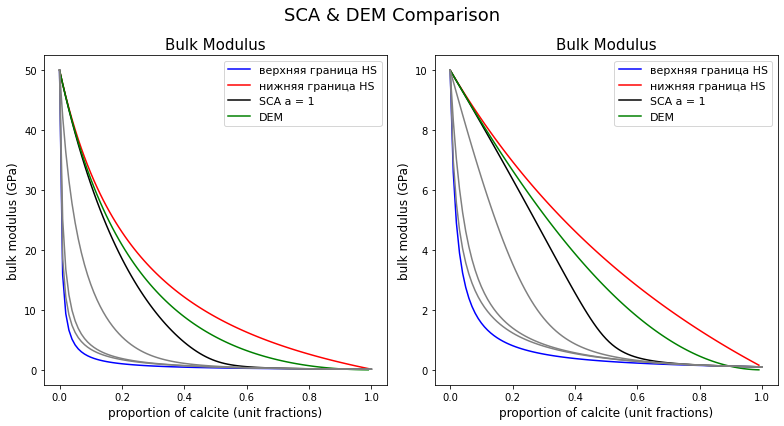

In [52]:
draw_plots(por_hs, bulk_down, bulk_up, shear_down, shear_up, por_sca, bulk_sca, shear_sca, por_dem, bulk_dem, shear_dem,
               por_sca_2, bulk_sca_2, shear_sca_2, por_sca_3, bulk_sca_3, shear_sca_3, por_sca_4, bulk_sca_4, shear_sca_4,
                 title = 'SCA & DEM Comparison', xlabel = 'proportion of calcite (unit fractions)',
                 file_name = 'SCA vs DEM (testing aspect ratio).png')

## Добавление в твердую матрицу пор 

### Круглые поры по DEM 

In [59]:
matrix = [56.308, 30.452]
por_dem, bulk_dem, shear_dem = get_all_values_by_DEM(matrix)
por_hs, bulk_down, bulk_up, shear_down, shear_up = get_HS_for_all_proportions([0.1, 0.1], matrix)

In [88]:
def draw_DEM_plots(por_hs, bulk_down, bulk_up, shear_down, shear_up, por_dem, bulk_dem, shear_dem,
                 title = 'Matrix + Spheroid Pores (DEM)', xlabel = 'porosity (unit fractions)',
                 file_name = 'matrix_round_pores(DEM).png'):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
    fig.suptitle(title, fontsize = 18)

    axes[0].plot(por_hs, bulk_down, c = 'b')
    axes[0].plot(por_hs, bulk_up, c = 'r')
    axes[0].plot(por_dem, bulk_dem, c = 'g')
    axes[0].legend(['верхняя граница HS', 'нижняя граница HS', 'значение SCA'], fontsize = 11)
    axes[0].set_title('Bulk Modulus', fontsize = 15)
    axes[0].set_xlabel(xlabel, fontsize = 12)
    axes[0].set_ylabel('bulk modulus (GPa)', fontsize = 12)

    axes[1].plot(por_hs, shear_down, c = 'b')
    axes[1].plot(por_hs, shear_up, c = 'r')
    axes[1].plot(por_dem, shear_dem, c = 'g')
    axes[1].legend(['верхняя граница HS', 'нижняя граница HS', 'значение SCA'], fontsize = 11)
    axes[1].set_title('Shear Modulus', fontsize = 15)
    axes[1].set_xlabel(xlabel, fontsize = 12)
    axes[1].set_ylabel('shear modulus (GPa)', fontsize = 12)


    fig.tight_layout()
    fig.savefig(file_name)

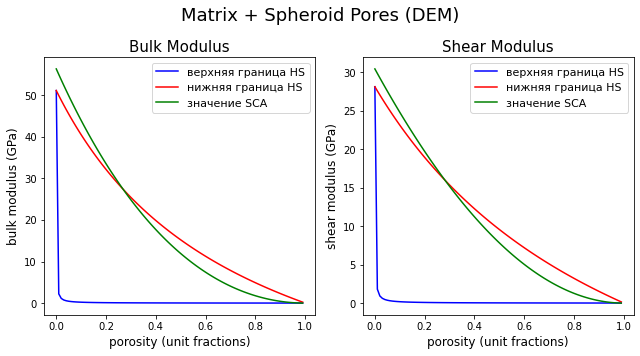

In [89]:
draw_DEM_plots(por_hs, bulk_down, bulk_up, shear_down, shear_up, por_dem, bulk_dem, shear_dem,
                 title = 'Matrix + Spheroid Pores (DEM)', xlabel = 'porosity (unit fractions)',
                 file_name = 'matrix_round_pores(DEM).png')

In [90]:
print('пористость', por_dem[4])
print('bulk modulus', bulk_dem[4])
print('shear modulus', shear_dem[4])

пористость 0.04
bulk modulus 51.10631527994135
shear modulus 28.134700252020618


### Трещины по SCA 

In [110]:
matrix = [51.106, 28.135, 1]
pores = [2.496, 0, 0.01]
por_sca, bulk_sca, shear_sca = get_all_values_by_SCA(pores, matrix)
por_hs, bulk_down, bulk_up, shear_down, shear_up = get_HS_for_all_proportions([2.496, 0.01], matrix)

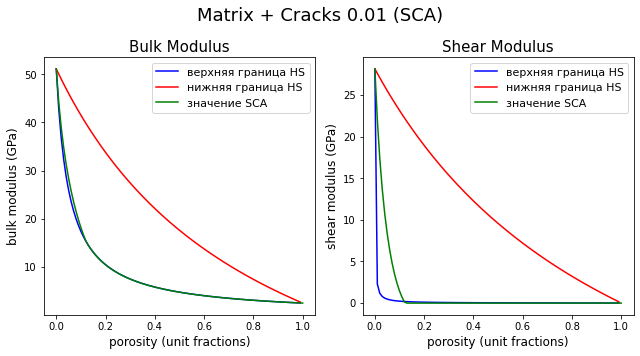

In [113]:
draw_DEM_plots(por_hs, bulk_down, bulk_up, shear_down, shear_up, por_sca, bulk_sca, shear_sca,
                 title = 'Matrix + Cracks 0.01 (SCA)', xlabel = 'porosity (unit fractions)',
                 file_name = 'matrix_cracks(SCA).png')

In [114]:
print('пористость', por_sca[1])
print('bulk modulus', bulk_sca[1])
print('shear modulus', shear_sca[1])

пористость 0.01
bulk modulus 44.207285963296776
shear modulus 22.023688051519766


## Wood & Gassmann Formulas 

In [123]:
# bulk модуль смеси флюидов по формуле Вуда (prop - в процентах)
def get_fluid_modulus_by_wood(fluid1, fluid2, prop):
    # функция принимает на вход объемные модули сжатия и объемное содержание всех флюидов,
    # входящих в поронасыщающую смесь, и возвращает модуль сжатия смеси (модуль сдвига флюида всегда = 0)

    bulk = [fluid1[0], fluid2[0]]
    average_shear = 0
    
    if bulk[0] == 0:
        bulk[0] = 0.0000001
    if bulk[1] == 0:
        bulk[1] = 0.0000001

    bulk = np.array(bulk)
    prop = np.array(prop)

    new_prop = prop / 100   # объемные отношения в долях единицы
    divided_bulk = np.sum(new_prop / bulk)
    average_bulk = 1 / divided_bulk   # объемный модуль сжатия смеси флюидов

    return [average_bulk, average_shear]

In [124]:
# формула Гассмана - получаем упругие модули породы, поры которой насыщены флюидом
def get_saturated_by_gassman(dry, matrix, fluid, porosity):
    k_dry, g_dry = dry  # сухая порода
    k_m, g_m = matrix  # твердое вещество (без пор)
    k_fl, g_fl = fluid  # флюид

    g_sat = g_dry

    k_sat = k_dry + (1 - k_dry / k_m) ** 2 / (porosity / k_fl + (1 - porosity) / k_m - k_dry / k_m ** 2)

    return [k_sat, g_sat]

In [129]:
fluid = get_fluid_modulus_by_wood([0.041, 0], [2.496, 0], 50)
print(fluid)

[0.08067481277098935, 0]


In [133]:
dry = [44.207, 22.024]
matrix = [56.308, 30.452]
fluid = [0.08067481277098935, 0]
porosity = 5

saturated = get_saturated_by_gassman(dry, matrix, fluid, porosity)
print(saturated)

[44.20774621878192, 22.024]
